In [100]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from datetime import datetime, date, time, timedelta
import matplotlib.cm as cm
import matplotlib.dates as mdates
import copy
import scipy as sp

In [4]:
#GetData
df = pd.read_csv("/home/dup193/work/di/temp_datalab_records_social_facebook.csv")
print(df.shape)
print(df.columns)

/home/dup193/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3621391, 14)
Index(['dataset_id', 'time', 'username', 'checkins', 'has_added_app',
       'were_here_count', 'likes', 'talking_about_count', 'facebook_id',
       'date_added', 'date_updated', 'entity_id', 'cusip', 'isin'],
      dtype='object')


In [5]:
df.head()

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [6]:
#Fix time and make a separeate date colums, for plotting
df["time2"] = pd.to_datetime(df['time'])
print(df['time2'].min(),df['time2'].max())
df['date'] = df['time2'].dt.date

2015-01-01 05:00:00+00:00 2018-07-17 04:00:00+00:00


In [8]:
#clean the Nan for the column we are interested in
print(df.isna().any())
df = df.dropna(subset=['talking_about_count','username'])

dataset_id             False
time                   False
username               False
checkins               False
has_added_app          False
were_here_count        False
likes                  False
talking_about_count    False
facebook_id            False
date_added              True
date_updated            True
entity_id               True
cusip                   True
isin                    True
time2                  False
date                   False
dtype: bool


In [10]:
df = df.drop(columns = ['time','dataset_id', 'date_added', 'date_updated','entity_id','cusip','isin'])

In [12]:
df = df.rename(columns={"time2": "time"})

In [13]:
df.head()

,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,time,date
0,SodaStream,0,f,0,761533,587,54885616308,2015-01-01 05:00:00+00:00,2015-01-01
1,ANSYSInc,148,f,0,43442,1305,160242297413411,2015-01-01 05:00:00+00:00,2015-01-01
2,MyAquaAmerica,0,f,0,5591,297,591693544195818,2015-01-01 05:00:00+00:00,2015-01-01
3,Qualcomm,173,f,0,1232521,2685,108472637291,2015-01-01 05:00:00+00:00,2015-01-01
4,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,2015-01-01 05:00:00+00:00,2015-01-01


In [15]:
df.to_pickle("/home/dup193/work/di/clean_data.pkl")

In [35]:
comps = df['username'].unique()
print(comps)

['SodaStream' 'ANSYSInc' 'MyAquaAmerica' ... 'DiscoveryCove'
 'cbssportingclub' 'gerdau']


In [18]:
df = pd.read_pickle("/home/dup193/work/di/clean_data.pkl")

In [48]:
tac = df.pivot(index ='date', columns = 'username', values = ['talking_about_count'])
tac.columns = [i[1] for i in tac.columns]
print(tac.shape)
tac.head()

(1241, 4950)


,1011News,1019thewolf,1027WGUS,105.7WROR,1079mixfm,10best,1800flowers,1ShoppingCart,1st.Sec.Bank,1stDetect,...,youtube,z2games,zagg,zavoligas,zendesk,zimmer,zimmerbiomet,zionoil,zipcar,zumiez
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,80.0,NaN,1001.0,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.0,NaN,1197.0,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,128.0,NaN,1197.0,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,172.0,NaN,1211.0,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,143.0,NaN,1211.0,NaN,NaN


In [49]:
lik = df.pivot(index ='date', columns = 'username', values = ['likes'])
lik.columns = [i[1] for i in lik.columns]
print(lik.shape)
lik.head()

(1241, 4950)


,1011News,1019thewolf,1027WGUS,105.7WROR,1079mixfm,10best,1800flowers,1ShoppingCart,1st.Sec.Bank,1stDetect,...,youtube,z2games,zagg,zavoligas,zendesk,zimmer,zimmerbiomet,zionoil,zipcar,zumiez
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24251.0,NaN,72306.0,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24259.0,NaN,72314.0,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24260.0,NaN,72318.0,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24265.0,NaN,72321.0,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24265.0,NaN,72319.0,NaN,NaN


In [50]:
tac.to_pickle("/home/dup193/work/di/pivot_tac.pkl")
lik.to_pickle("/home/dup193/work/di/pivot_likes.pkl")

In [64]:
tac = pd.read_pickle("/home/dup193/work/di/pivot_tac.pkl")
lik = pd.read_pickle("/home/dup193/work/di/pivot_likes.pkl")

In [52]:
def smooth(data, n_pts):
    box = np.ones(n_pts)/n_pts
    smooth = np.convolve(data, box, mode='same')
    return smooth

In [119]:
def gauss(data, n_pts, sigma):
    x = np.ones(n_pts)/n_pts
    func =  np.exp(-(x/sigma)**2/2)
    gauss = np.convolve(data, func, mode='same')
    return gauss

In [65]:
names = tac.columns
print(names)

Index(['1011News', '1019thewolf', '1027WGUS', '105.7WROR', '1079mixfm',
       '10best', '1800flowers', '1ShoppingCart', '1st.Sec.Bank', '1stDetect',
       ...
       'youtube', 'z2games', 'zagg', 'zavoligas', 'zendesk', 'zimmer',
       'zimmerbiomet', 'zionoil', 'zipcar', 'zumiez'],
      dtype='object', length=4950)


In [313]:
test = ['CBSNews','Fox8NewsCleveland','MomsBestFanPage','NYPost','ToyotaSpecialShowroom','dickssportinggoods','kohls','nytimes','wwe','yahoo']
start = pd.to_datetime("01/10/2015")
end = pd.to_datetime("07/17/2018")
#start = pd.to_datetime("04/01/2016")
#end = pd.to_datetime("07/01/2016")

colors = ["black", "darkred", "darkorange", 'goldenrod',"forestgreen", "darkslategrey","darkblue","indigo","purple",'deeppink']

In [123]:
def Plot_TAC(df):
    plt.subplots_adjust(top=0.88)
    fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(15, 10),sharex =True)
    fig.suptitle("test", fontsize="x-large")
    fig.tight_layout()
    for i, name in enumerate(test):
        axes[i].tick_params(axis='x',which='both', bottom=False)
        axes[i].tick_params(axis='y',which='both', left=False)
        axes[i].set_yticks([])
        axes[i].set_xticks([])
        df[name].plot(ax=axes[i],grid =True, label=name.upper(), c = colors[i],xlim=(start,end))
        axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
        axes[i].set_xlabel('DATE',fontsize="x-large")
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['left'].set_visible(False)
        axes[i].spines['top'].set_visible(False)
        axes[i].legend(loc='upper left')
    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9)
   # plt.savefig(name+".png",dpi=72, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

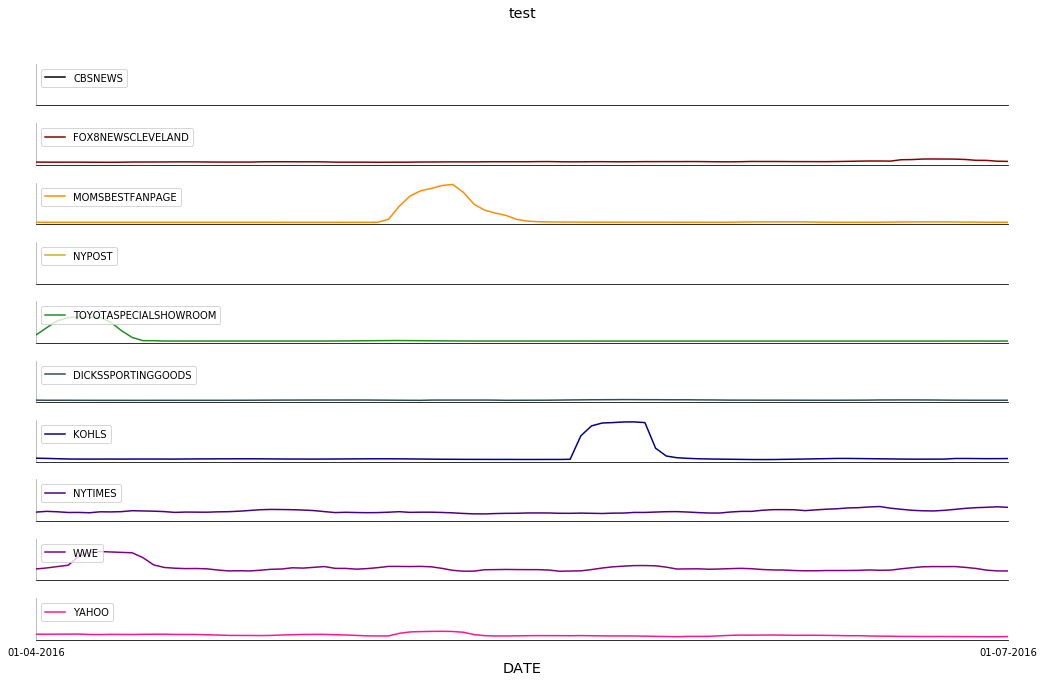

In [284]:
Plot_TAC(tac)

<Figure size 432x288 with 0 Axes>

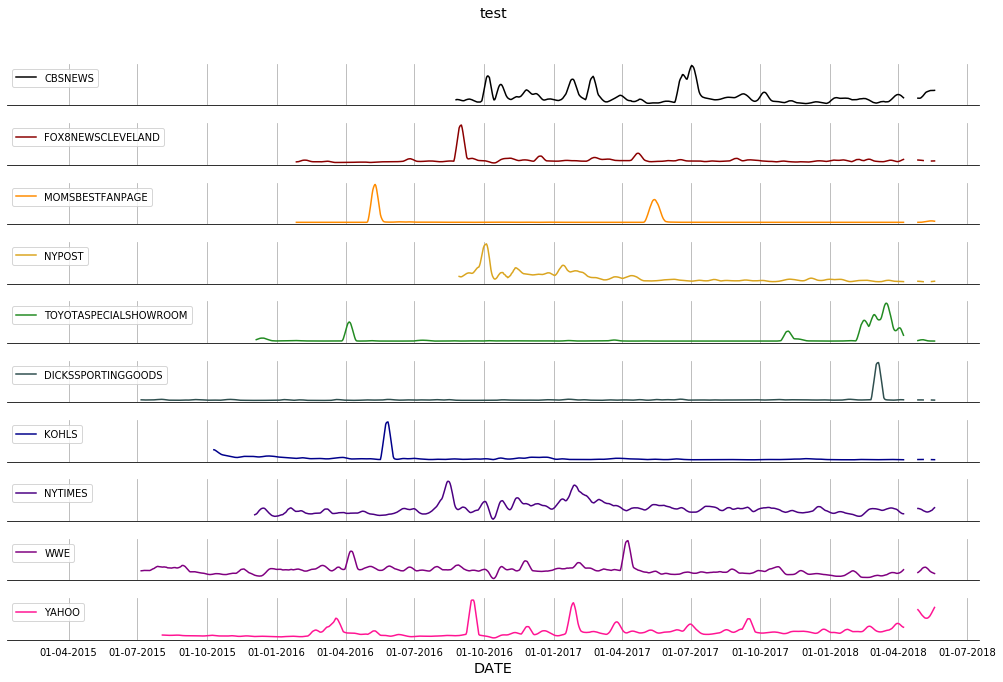

In [86]:
sm = pd.DataFrame(index=tac.index)
for name in test:
    sm[name] = smooth(tac[name],10)
Plot_TAC(sm)

<Figure size 432x288 with 0 Axes>

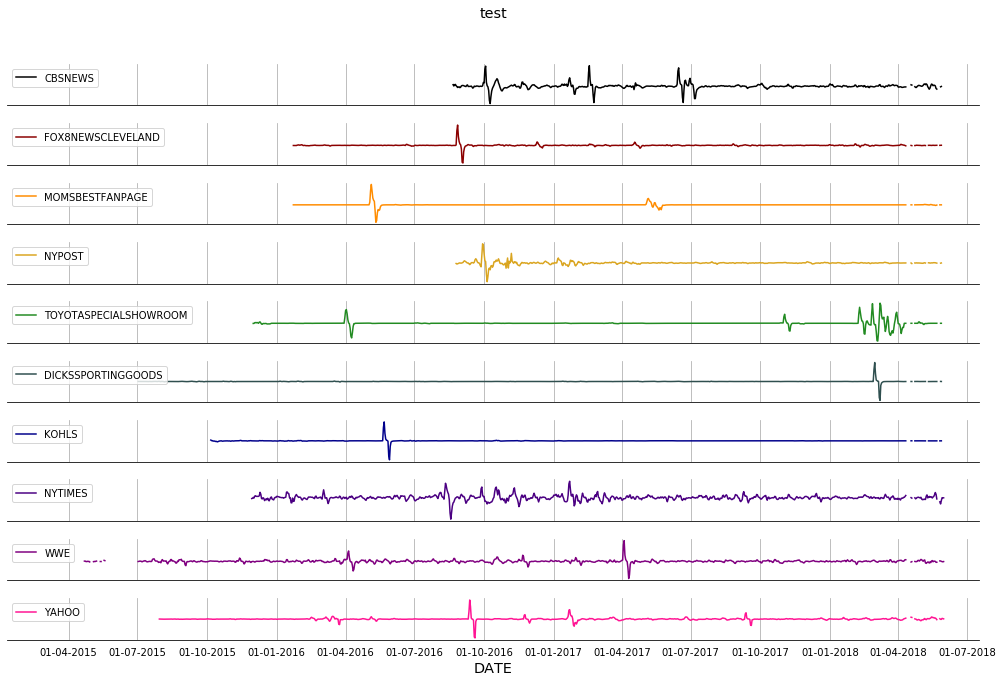

In [97]:
der = pd.DataFrame(index=tac.index)
for name in test:
    der[name] = np.gradient(tac[name])
Plot_TAC(der)

<Figure size 432x288 with 0 Axes>

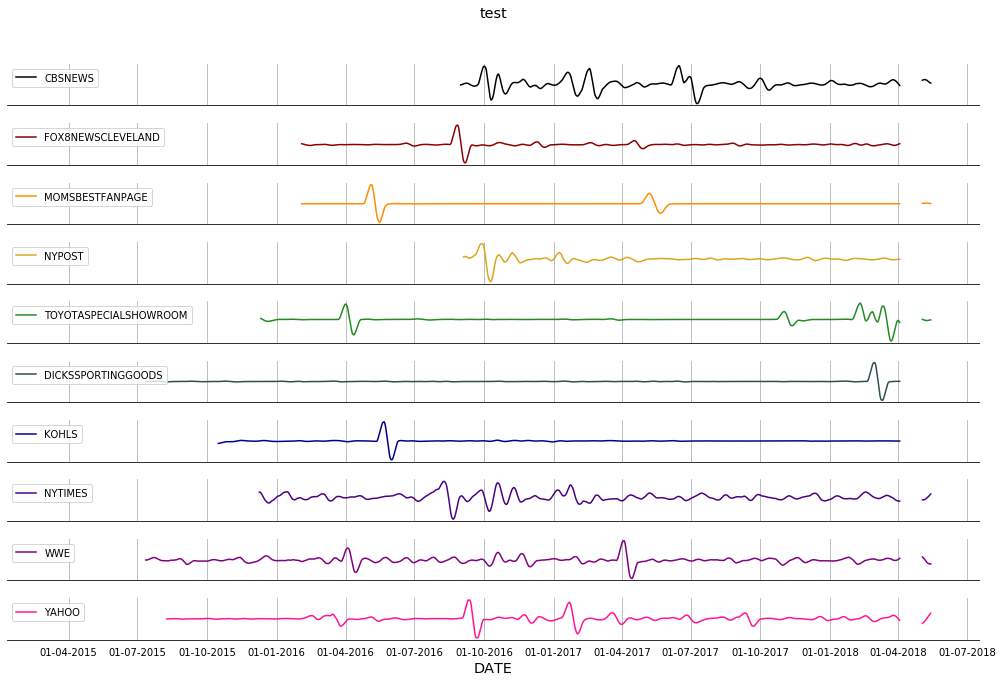

In [90]:
dsm = pd.DataFrame(index=tac.index)
for name in test:
    dsm[name] = smooth(der[name],10)
Plot_TAC(dsm)

In [165]:
def Plot_3(df,df1,df2):
    plt.subplots_adjust(top=0.88)
    fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(15, 10),sharex =True)
    fig.suptitle("test", fontsize="x-large")
    fig.tight_layout()
    for i, name in enumerate(test):
        axes[i].tick_params(axis='x',which='both', bottom=False)
        axes[i].tick_params(axis='y',which='both', left=False)
        axes[i].set_yticks([])
        axes[i].set_xticks([])
        df[name].plot(ax=axes[i],grid =True, label=name.upper(), c = colors[i],xlim=(start,end))
        df1[name].plot(ax=axes[i],grid =True, label=name.upper(), ls ="--", c = colors[i],xlim=(start,end))
        df2[name].plot(ax=axes[i],grid =True, label=name.upper(), ls =":", c = colors[i],xlim=(start,end))
        axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
        axes[i].set_xlabel('DATE',fontsize="x-large")
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['left'].set_visible(False)
        axes[i].spines['top'].set_visible(False)
        axes[i].legend(loc='upper left')
    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9)
   # plt.savefig(name+".png",dpi=72, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

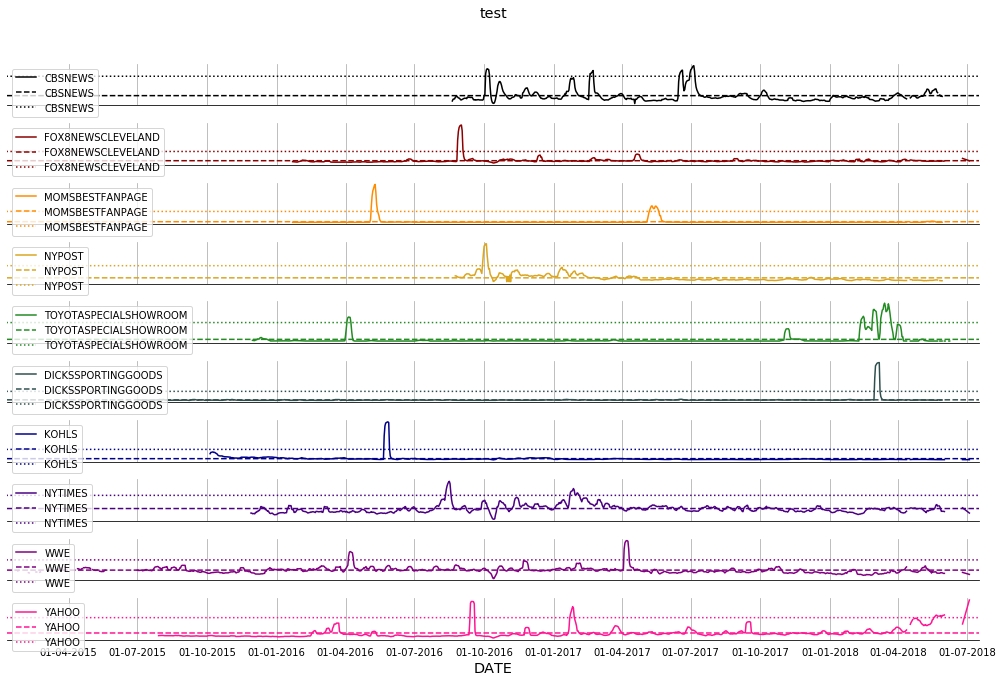

In [98]:
avr = pd.DataFrame(index=tac.index)
std = pd.DataFrame(index=tac.index)
for name in test:
    avr[name] = np.mean(tac[name])*np.ones(len(tac))
    std[name] = (np.mean(tac[name])+3*np.std(tac[name]))*np.ones(len(tac))
Plot_3(tac,avr,std)

<Figure size 432x288 with 0 Axes>

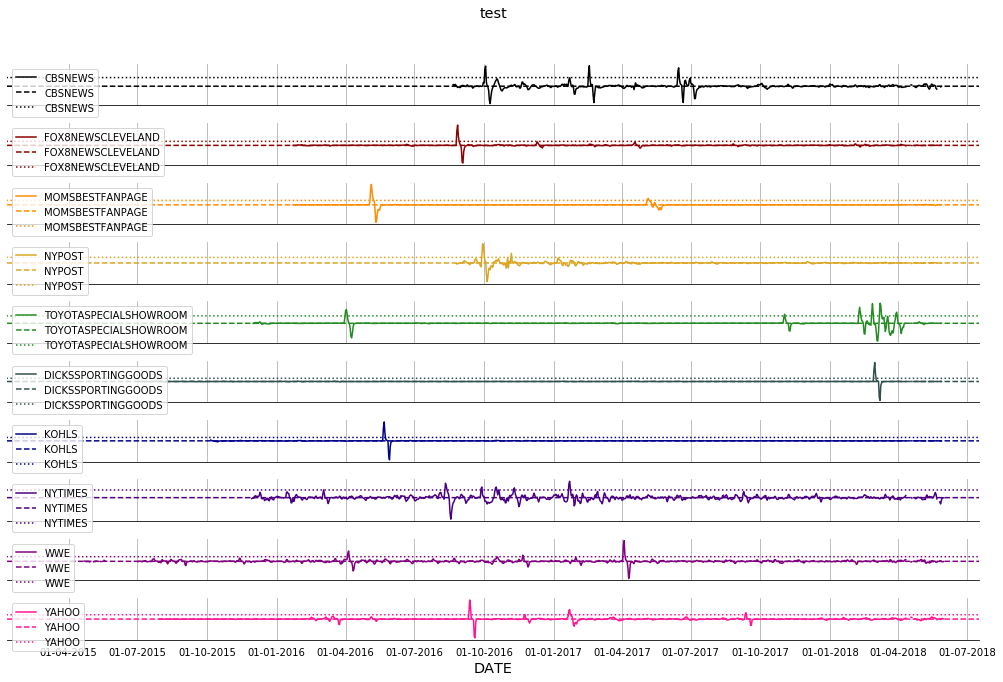

In [99]:
avr = pd.DataFrame(index=tac.index)
std = pd.DataFrame(index=tac.index)
for name in test:
    avr[name] = np.mean(der[name])*np.ones(len(der))
    std[name] = (np.mean(der[name])+3*np.std(der[name]))*np.ones(len(der))
Plot_3(der,avr,std)

In [101]:
#find where count crosses 3 sigma threshold
#find where count crosses 0.5 sigma threshold
#Find 2 closest 0.5 crossing to 3 crossing
#Find heigh and width of the peak
#find likes change
#find 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d30b3fc10>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

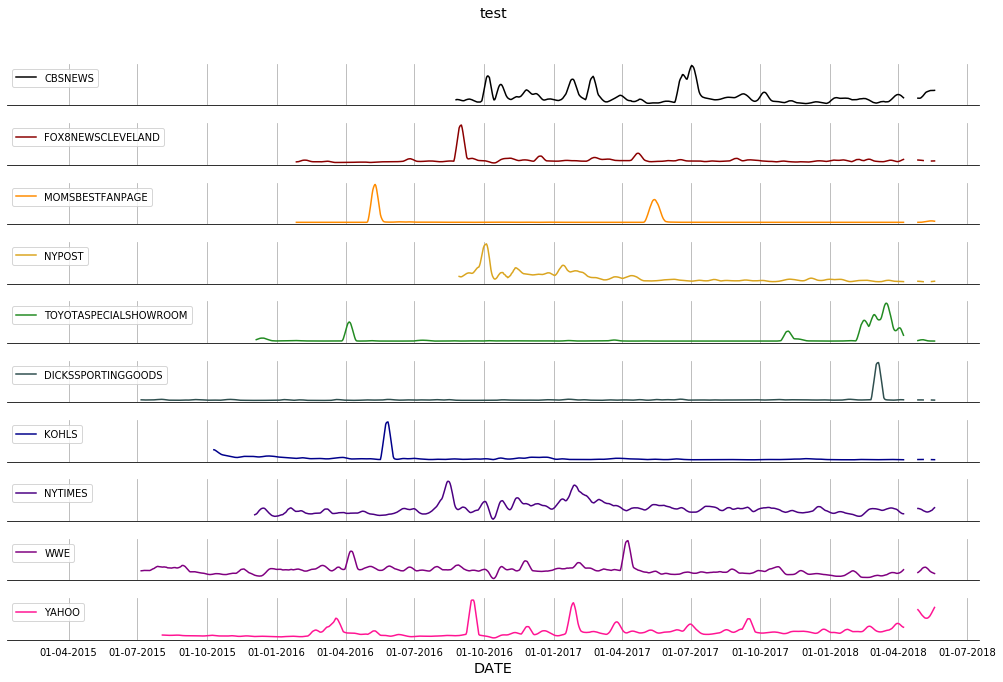

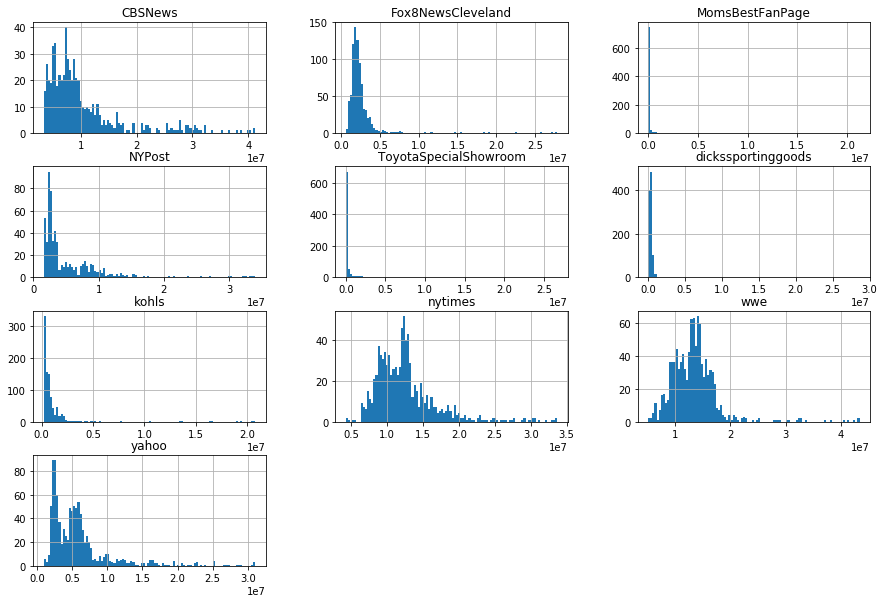

In [255]:
gs = pd.DataFrame(index=tac.index)
for name in test:
    gs[name] = gauss(tac[name],10,2)
Plot_TAC(gs)
gs.hist(bins=100,figsize = (15,10))

In [218]:
def find_crossings(df):
    edges = []
    l = df.to_list()
    for i,val in enumerate(df):
        if (l[i:i+2] == [0.0, 1.0]):
            edges.append([1,i,df.index[i]])
        if (l[i:i+2] == [1.0, 0.0]):
            edges.append([0,i,df.index[i]])
    edges = np.array(edges)
    ind = np.argsort(edges[:,1]) 
    edges = edges[ind]
    if edges[0][0] == 0.0:
        edges = edges[1:]
  
    rises = [i for i in edges if i[0] == 1]
    falls = [i for i in edges if i[0] == 0]
    
    peaks = []
    for rise in rises:
        pos_falls  = np.array([i for i in falls if i[1]>rise[1]])
        ind = np.argsort(pos_falls[:,1]) 
        pos_falls = pos_falls[ind]
        fall = pos_falls[0]
        peaks.append([rise[2],fall[2],rise[1],fall[1]])    
    
    return peaks

In [306]:
tac_peaks = {}

avr = pd.DataFrame(index=tac.index)
std = pd.DataFrame(index=tac.index)
t = pd.DataFrame(index=tac.index)
b = pd.DataFrame(index=tac.index)
d = 30


for name in test:
    Mean = np.mean(gs[name])
    Sig = np.std(gs[name])
    mask = np.zeros(len(gs))
    for i,val in enumerate(gs[name]):
        if i <d:
            mean = np.mean(gs[name][:i])
            sig = np.std(gs[name][:i])
            if (val > mean+2.5*sig) and (val > Mean):
                mask[i] = 1
        else:
            mean = np.mean(gs[name][i-d:i])
            sig = np.std(gs[name][i-d:i])
            if (val > mean+2.5*sig) and (val > Mean):
                mask[i] = 1
            
    t[name] = mask
    peaks = find_crossings(t[name])
    
    mask2 = np.zeros(len(gs))    
    for peak in peaks:
        min_val = np.min(gs[name][peak[2]:peak[3]])
        mask2[peak[2]]=1
        new_len = 0
        for i in gs[name][peak[2]:]:
            if (i >= min_val) and (new_len < d):
                new_len = new_len+1
                mask2[peak[2]+new_len] =1
            else:
                break
                
        peak[3]=peak[2]+new_len
    
    tac_peaks[name] = peaks
    b[name] = mask2*(Mean+3*Sig)
    t[name] = mask*(Mean+6*Sig)

<Figure size 432x288 with 0 Axes>

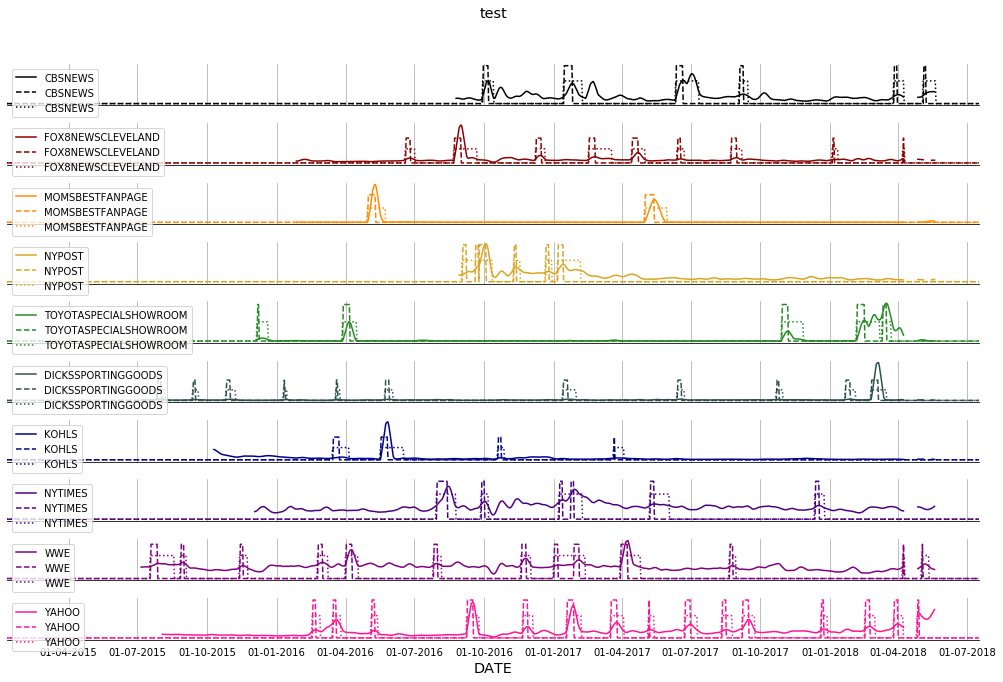

In [314]:
Plot_3(gs,t,b)

In [319]:
data = []
#        ("event_time", np.uint32),
#        ("google", np.uint32),
#        ("facebook", np.uint32),
#        ("time_window", np.uint32),
#        ("loc", np.uint32),
#        ("height_std", np.uint32),
#        ("height_count", np.uint32),
#        ("duration", np.uint32),
#        ("likes", np.uint32)

for name in test:
    Mean = tac[name].mean()
    Std = tac[name].std()
    for i,tac_peak in enumerate(tac_peaks[name]):
        event = {}
        evt = [tac_peak[0]-pd.to_timedelta(2, unit='d'),tac_peak[0]]
        max_peak =tac[name][tac_peak[2]:tac_peak[3]].max()
        mean_before_int= tac[name][tac_peak[2]-d:tac_peak[2]].mean()
        std_before_int= tac[name][tac_peak[2]-d:tac_peak[2]].mean()
        event['name'] = name
        event['time'] = evt
        event['google'] = name+" after:"+evt[0].strftime('%Y-%m-%d')+" before:"+evt[1].strftime('%Y-%m-%d')
        event['facebook'] = name+" after:"+evt[0].strftime('%Y-%m-%d')+" before:"+evt[1].strftime('%Y-%m-%d')+ " site:facebook"
        event['time_window'] = [df.index[tac_peak[2]], df.index[tac_peak[3]]]
        event['loc'] = [tac_peak[2], tac_peak[3]]
        event['height_std'] = (max_peak-mean_before_int)/std_before_int
        event['height_count'] = (max_peak-mean_before_int)
        event['duration'] = tac_peak[3]-tac_peak[2]
        event['likes'] = (lik[name][tac_peak[3]]-lik[name][tac_peak[2]])/lik[name][tac_peak[2]]
        data.append(event)

In [320]:
peak_df = pd.DataFrame(data)

In [322]:
peak_df.to_pickle("/home/dup193/work/di/peak_df.pkl")

In [ ]:
peak_df = pd.read_pickle("/home/dup193/work/di/peak_df.pkl")

In [321]:
peak_df[:20]

,name,time,google,facebook,time_window,loc,height_std,height_count,duration,likes
0,CBSNews,"[2016-09-27, 2016-09-29]",CBSNews after:2016-09-27 before:2016-09-29,CBSNews after:2016-09-27 before:2016-09-29 sit...,"[608, 622]","[608, 622]",6.405724,3.975333e+06,14,0.025468
1,CBSNews,"[2017-01-12, 2017-01-14]",CBSNews after:2017-01-12 before:2017-01-14,CBSNews after:2017-01-12 before:2017-01-14 sit...,"[715, 739]","[715, 739]",3.780496,2.702325e+06,24,0.043200
2,CBSNews,"[2017-06-09, 2017-06-11]",CBSNews after:2017-06-09 before:2017-06-11,CBSNews after:2017-06-09 before:2017-06-11 sit...,"[863, 893]","[863, 893]",9.206388,4.505839e+06,30,0.034245
3,CBSNews,"[2017-09-01, 2017-09-03]",CBSNews after:2017-09-01 before:2017-09-03,CBSNews after:2017-09-01 before:2017-09-03 sit...,"[947, 958]","[947, 958]",0.492843,4.432813e+05,11,0.005550
4,CBSNews,"[2018-03-24, 2018-03-26]",CBSNews after:2018-03-24 before:2018-03-26,CBSNews after:2018-03-24 before:2018-03-26 sit...,"[1151, 1164]","[1151, 1164]",1.660338,8.697218e+05,13,0.005716
5,CBSNews,"[2018-05-02, 2018-05-04]",CBSNews after:2018-05-02 before:2018-05-04,CBSNews after:2018-05-02 before:2018-05-04 sit...,"[1190, 1206]","[1190, 1206]",1.128105,1.006472e+06,16,0.010705
6,Fox8NewsCleveland,"[2016-06-17, 2016-06-19]",Fox8NewsCleveland after:2016-06-17 before:2016...,Fox8NewsCleveland after:2016-06-17 before:2016...,"[506, 518]","[506, 518]",1.835940,2.832852e+05,12,0.016994
7,Fox8NewsCleveland,"[2016-08-20, 2016-08-22]",Fox8NewsCleveland after:2016-08-20 before:2016...,Fox8NewsCleveland after:2016-08-20 before:2016...,"[570, 600]","[570, 600]",22.160472,3.913074e+06,30,0.053306
8,Fox8NewsCleveland,"[2016-12-06, 2016-12-08]",Fox8NewsCleveland after:2016-12-06 before:2016...,Fox8NewsCleveland after:2016-12-06 before:2016...,"[678, 690]","[678, 690]",2.458238,6.067428e+05,12,0.024953
9,Fox8NewsCleveland,"[2017-02-14, 2017-02-16]",Fox8NewsCleveland after:2017-02-14 before:2017...,Fox8NewsCleveland after:2017-02-14 before:2017...,"[748, 778]","[748, 778]",1.729517,3.608563e+05,30,0.037595
